# Experiment: Leader Election

We test leader election and count the number of messages required for it under different topologies

In [1]:
"""Load libraries
"""
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = [12, 8]

import math
import numpy as np

from utils import init_simulation, run_simulation

from events import StartLeaderElection

num_fish = 10
clock_freq = 10  # in Hz
single_time = num_fish * 2  # run time of one trial
offset_time = 1  # offset in sec when the first trial starts
num_trials = 1
final_buffer = 3
run_time = single_time * num_trials + final_buffer # in seconds
run_time /= (clock_freq * 0.9)
size_dist = 100
center = size_dist / 2.0
conn_drop = 1.5

Please wait patiently 2.5555555555555554 seconds. Thanks.
It's time to say bye bye!


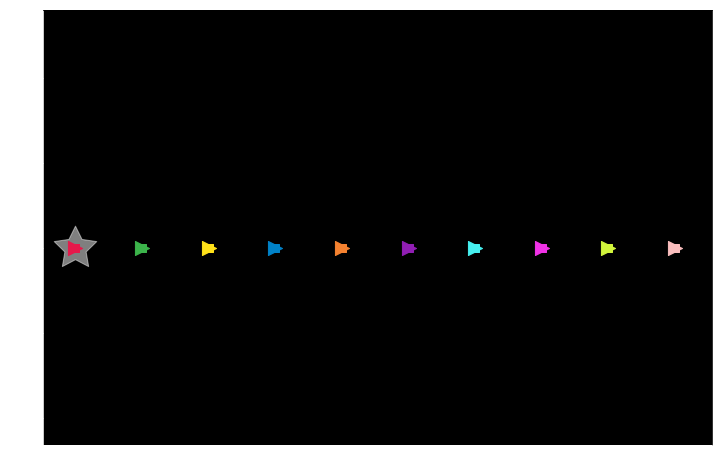

Leader: [[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]]
Num. Messages: [55]


In [25]:
fish_pos = np.zeros((num_fish, 2))
fish_pos[:,0] = np.arange(num_fish) + center - (num_fish / 2)
fish_pos[:,1] = center

channel, environment, fish, interaction, observer = init_simulation(
    clock_freq=clock_freq,
    single_time=single_time,
    offset_time=offset_time,
    num_trials=num_trials,
    final_buffer=final_buffer,
    run_time=run_time,
    num_fish=num_fish,
    size_dist=size_dist,
    center=center,
    spread=20,
    fish_pos=fish_pos,
    lim_neighbors=[1, math.inf],
    neighbor_weights=1.0,
    fish_max_speeds=1,
    noise_magnitude=0,
    conn_thres=1.5,
    prob_type='binary',
    dist_type='none',
    verbose=False,
    conn_drop=conn_drop
)

for i in range(num_trials):
    observer.instruct(
        event=StartLeaderElection(),
        rel_clock=i * single_time + offset_time,
        fish_id=0
    )
observer.study('leader')  # Store information on the info propagation

run_simulation(fish=fish, observer=observer, run_time=run_time, dark=True, white_axis=True, no_legend=True)

Please wait patiently 2.5555555555555554 seconds. Thanks.
It's time to say bye bye!


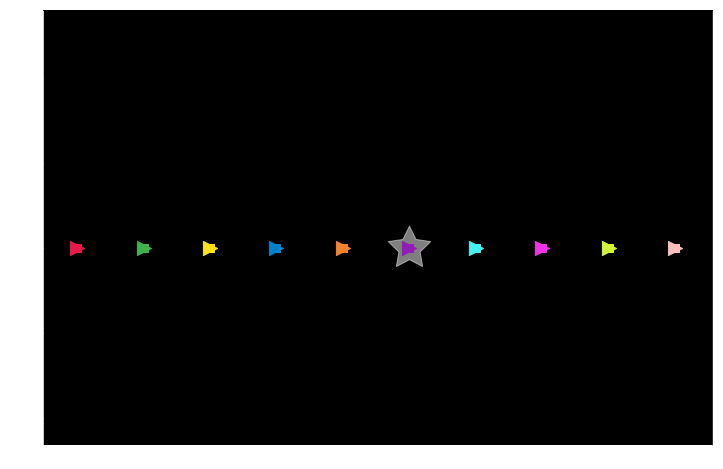

Leader: [[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]]
Num. Messages: [40]


In [26]:
fish_pos = np.zeros((num_fish, 2))
fish_pos[:,0] = np.arange(num_fish) + center - (num_fish / 2)
fish_pos[:,1] = center

channel, environment, fish, interaction, observer = init_simulation(
    clock_freq=clock_freq,
    single_time=single_time,
    offset_time=offset_time,
    num_trials=num_trials,
    final_buffer=final_buffer,
    run_time=run_time,
    num_fish=num_fish,
    size_dist=size_dist,
    center=center,
    spread=20,
    fish_pos=fish_pos,
    lim_neighbors=[1, math.inf],
    neighbor_weights=1.0,
    fish_max_speeds=1,
    noise_magnitude=0,
    conn_thres=1.5,
    prob_type='binary',
    dist_type='none',
    verbose=False,
    conn_drop=conn_drop
)

for i in range(num_trials):
    observer.instruct(
        event=StartLeaderElection(),
        rel_clock=i * single_time + offset_time,
        fish_id=5
    )
observer.study('leader')  # Store information on the info propagation

run_simulation(fish=fish, observer=observer, run_time=run_time, dark=True, white_axis=True, no_legend=True)

### Leader election in a more realistic setting with noise, aggregation, and sigmoid transmission probability

Please wait patiently 12.777777777777777 seconds. Thanks.
It's time to say bye bye!


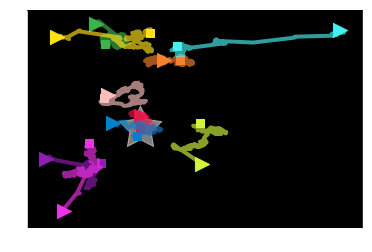

Leader: [[9, 9, 9, 9, 9, 9, -1, 9, 9, 9], [0, 9, 9, 9, 9, 9, 6, 9, 9, 9], [0, 9, 9, 9, 9, 9, 6, 9, 9, 9], [0, 9, 9, 9, 9, 9, 6, 9, 9, 9], [0, 9, 9, 9, 9, 9, 6, 9, 9, 9]]
Num. Messages: [22, 2, 1, 1, 1]


In [7]:
offset = 0
spread = 10
fish_pos = spread * np.random.rand(num_fish, 2) + center - spread/2.0
fish_pos[0] = np.array([center + offset, center + offset])

num_trials = 5

channel, environment, fish, interaction, observer = init_simulation(
    clock_freq=clock_freq,
    single_time=single_time,
    offset_time=offset_time,
    num_trials=num_trials,
    final_buffer=final_buffer,
    run_time=run_time * num_trials,
    num_fish=num_fish,
    size_dist=size_dist,
    center=center,
    spread=20,
    fish_pos=fish_pos,
    lim_neighbors=[3, math.inf],
    neighbor_weights=1.0,
    fish_max_speeds=1,
    noise_magnitude=0.1,
    conn_thres=4,
    prob_type='sigmoid',
    dist_type='none',
    verbose=False,
    conn_drop=conn_drop
)

for i in range(num_trials):
    observer.instruct(
        event=StartLeaderElection(),
        rel_clock=i * single_time + offset_time,
        fish_id=0
    )
observer.study('leader')  # Store information on the info propagation

run_simulation(fish=fish, observer=observer, run_time=run_time * num_trials, dark=True, white_axis=True, no_legend=True)